In [30]:
import pandas as pd
import glob
import os

In [65]:
timeseries = []

for file in glob.glob("../data/2022-08/*.pkl"):

    timeseries.append(pd.read_pickle(file).sys_kW.rename(os.path.basename(file).split(".")[0]))

In [66]:
from functools import reduce

power = reduce(lambda left, right: pd.merge_asof(left, right, left_index=True, right_index=True, tolerance=pd.Timedelta("5s")), timeseries)


<AxesSubplot: xlabel='tsdb_time'>

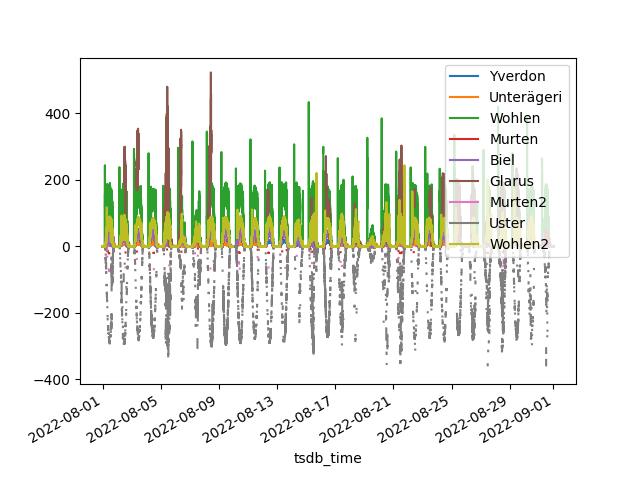

In [67]:
%matplotlib widget

power.plot()

In [ ]:
power.to_pickle("../data/2022-08.pkl")